In [4]:
import numpy as np
import pandas as pd
from datascience import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# *Above and Beyond:* Soccer Project

## The Data Science Life Cycle - Table of Contents

<a href='#section 0'>Background Knowledge</a>

<a href='#subsection 1a'>Formulating a question or problem</a> 

<a href='#subsection 1b'>Acquiring and preparing data</a>

<a href='#subsection 1c'>Conducting exploratory data analysis</a>

<a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

### Background Knowledge <a id='section 0'></a>


Nothing frustrates both soccer fans and players as much as being [red-carded](https://en.wikipedia.org/wiki/Penalty_card#Red_card). In soccer, receiving a red card from the referee means that the player awarded the red card is expelled from the game, and consequently his team must play with one fewer player for the remainder of the game.

Due to the inherently subjective nature of referees' judgments, questions involving the fairness of red card decisions crop up frequently, especially when soccer players with darker complexions are red-carded.

Last week, we explored a dataset on red-cards and skin color and attempt to understand how different approachs to analysis can lead to different conclusions to the general question: "Are referees more likely to give red cards to darker-skinned players?"

In this notebook, we will be taking a deeper look at country-specific data and how it compares between clubs within a given league.

 <img src="images/redcard.jpg" width = 700/>

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a question or problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and that will avoid misleading results. Since at least one group member has seen this data before, consult with them in the following section.

<div class="alert alert-info">
<b>Question:</b> Recall the questions about red cards and skin color that you encountered in your initial investigation last week. Now, think about questions you still have and want to answer. What kind of data is needed to address these questions?
   </div>
   

**Your questions:** *here*

**Data you would need:** *here*

<div class="alert alert-info">
<b>Question:</b> Now, taking a look at the data you already have, think of a few questions that you <b>could</b>
    answer with the current data set.
   </div>

**Your questions:** *here*

**Columns / information you would need:** *here*

## Acquiring and cleaning data <a id='subsection 1b'></a>
 
In this notebook, you'll be working with a dataset containing entries for many European soccer players, containing variables such as club, position, games, and skin complexion.

Important to note about this dataset is that it was generated as the result of an [observational study](https://en.wikipedia.org/wiki/Observational_study), rather than a [randomized controlled experiment](https://en.wikipedia.org/wiki/Randomized_controlled_trial). In an observational study, entities' independent variables (such as race, height, zip code) are observed, rather than controlled as in the randomized controlled experiment. Though data scientists often prefer the control and accuracy of controlled experiments, often performing one is either too costly or poses ethical questions (e.g., testing trial drugs and placebo treatments on cancer patients at random). Though our dataset was generated organically--in the real world rather than in a laboratory--it is statistically more challenging to prove causation among variables for these kinds of observational studies.


Please read this summary of the [dataset's description](https://osf.io/9yh4x/) to familiarize yourself with the context of the data:

>*...we obtained data and profile photos from all soccer players (N = 2053) playing in the first male divisions of England, Germany, France and Spain in the 2012-2013 season and all referees (N = 3147) that these players played under in their professional career. We created a dataset of player dyads including the number of matches players and referees encountered each other and our dependent variable, the number of red cards given to a player by a particular referee throughout all matches the two encountered each other.*

>*...implicit bias scores for each referee country were calculated using a race implicit association test (IAT), with higher values corresponding to faster white | good, black | bad associations. Explicit bias scores for each referee country were calculated using a racial thermometer task, with higher values corresponding to greater feelings of warmth toward whites versus blacks.*

In [5]:
# Run this cell to load the data

data = pd.read_csv("data/CrowdstormingDataJuly1st.csv").dropna()
data = Table.from_df(data)

Here are some of the important fields in our data set that we will focus on:

|Variable Name   | Description |
|--------------|------------|
|`player` | player's name |
|`club` | player's soccer club (team) |
|`leagueCountry`| country of player club (England, Germany, France, and Spain) |
|`height` | player height (in cm) |
|`games`| number of games in the player-referee dyad |
|`position` | detailed player position |
|`goals`| goals scored by a player in the player-referee dyad |
|`yellowCards`| number of yellow cards player received from referee |
|`yellowReds`| number of yellow-red cards player received from referee |
|`redCards`| number of red cards player received from referee |
|`rater1`| skin rating of photo by rater 1 (5-point scale ranging from very light skin to very dark skin |
|`rater2`| skin rating of photo by rater 2 (5-point scale ranging from very light skin to very dark skin |
|`meanIAT`|  mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white good, black bad associations |
|`meanExp`| mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks |

As you can see on the table above, two of the variables we will be exploring is the ratings on skin tone (1-5) measured by two raters, Lisa and Shareef. For context, we have added a series of images that were given to them so that you can better understand their perspective on skin tones. Keep in mind that this might affect our hypothesis and drive our conclusions. 

Note: On the following images, the only two were the rating for the two raters coincide is image #3 on the top and image #6 on the bottom. 

<img src="images/L1S1.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L1S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L2S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L3S4.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L4S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L5S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

In [4]:
# Run this cell show the first ten rows of the data
data.show(10)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044
aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182,71,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187,80,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180,68,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1,1,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193,80,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180,70,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177,74,Right Fullback,2,2,0,0,0,1,0,0,59786.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181,74,Left Winger,1,1,0,0,0,0,0,0,23229.jpg,0.5,0.5,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187,80,Center Back,1,1,0,0,0,0,0,0,59387.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522


Let's remove the columns we are not going to be working with.

In [6]:
cols_to_drop = ["birthday", "victories", "ties", "defeats", "goals",
                "photoID", "Alpha_3", "nIAT", "nExp"]

data = data.drop(cols_to_drop)

Let's reload the table to make sure we got rid of all of our undesired columns.

In [7]:
data.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,177,72,Attacking Midfielder,1,0,0,0,0.25,0.5,1,1,0.326391,0.000564112,0.396,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,179,82,Right Winger,1,1,0,0,0.75,0.75,2,2,0.203375,0.0108749,-0.204082,0.0615044
aaron-hughes,Aaron Hughes,Fulham FC,England,182,71,Center Back,1,0,0,0,0.25,0,4,4,0.325185,0.00329681,0.538462,0.0137522
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187,80,Left Fullback,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522
alexander-tettey,Alexander Tettey,Norwich City,England,180,68,Defensive Midfielder,1,0,0,0,1,1,4,4,0.325185,0.00329681,0.538462,0.0137522


### Combining `rater1` and `rater2`

Getting the average of the two rates requires a series of steps. We will: 
1. Create get the average of the two raters and assign it to a new variable called `avg_rate`
2. Add it to the orignal data table: `data`
3. Remove from the data table any column that has missing data (nan) for the `avg_rate` column, and assign this clean table to `cleaned_soccer.`

Run the following cell to make the appropriate changes:

In [8]:
# Calculate average rate, append to table
avg_rate = (data.column('rater1') + data.column('rater2'))/2
data.append_column('avgRate', avg_rate)

# Remove nan values
to_exclude= make_array()
for row_index in range(len(data.column("avgRate"))):
    if np.isnan(data.column("avgRate").item(row_index)):
        to_exclude= np.append(to_exclude,int(row_index))
data = data.exclude(to_exclude)
data.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp,avgRate
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,177,72,Attacking Midfielder,1,0,0,0,0.25,0.5,1,1,0.326391,0.000564112,0.396,0.00269649,0.375
john-utaka,John Utaka,Montpellier HSC,France,179,82,Right Winger,1,1,0,0,0.75,0.75,2,2,0.203375,0.0108749,-0.204082,0.0615044,0.75
aaron-hughes,Aaron Hughes,Fulham FC,England,182,71,Center Back,1,0,0,0,0.25,0,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187,80,Left Fullback,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
alexander-tettey,Alexander Tettey,Norwich City,England,180,68,Defensive Midfielder,1,0,0,0,1,1,4,4,0.325185,0.00329681,0.538462,0.0137522,1


# Conducting EDA: Club Teams

The initial investigation within the Soccer Project concerned the difference in red card incidents between European soccer leagues. While we were able to make comparisons across leagues, we did not look at the differences within the leagues themselves. That is, we ignored the `club` column of the original table completely.

[This Wikipedia article](https://en.wikipedia.org/wiki/List_of_top-division_football_clubs_in_UEFA_countries) explains the European Club system as follows:

>The Union of European Football Associations (UEFA) is the administrative and controlling body for European football. It consists of 55 member associations, each of which is responsible for governing football in their respective countries.[1]

>All widely recognised sovereign states located entirely within Europe are members, with the exceptions of the United Kingdom, Monaco and Vatican City. Eight states partially or entirely outside Europe are also members: Armenia, Azerbaijan, Russia, Georgia, Kazakhstan, Israel, Cyprus and Turkey.[1] The United Kingdom is divided into the four separate football associations of England, Northern Ireland, Scotland, and Wales; each association has a separate UEFA membership. The Faroe Islands, an autonomous country of the Kingdom of Denmark, also has its own football association which is a member of UEFA.[1] The football association of Gibraltar, a British Overseas Territory, was approved as a member by UEFA in 2013.[2] Kosovo was approved as a member in 2016, even though it is claimed by Serbia and is not recognised by several other UEFA member states.

>Each UEFA member has its own football league system, except Liechtenstein.[3] Clubs playing in each top-level league compete for the title as the country's club champions. Clubs also compete in the league and national cup competitions for places in the following season's UEFA club competitions, the UEFA Champions League, UEFA Europa League and UEFA Europa Conference League. Due to promotion and relegation, the clubs playing in the top-level league are different every season, except in San Marino and Gibraltar where there is only one level.[4]

**In this notebook**, we will look at the skin rating differences and red card incidents between the clubs (teams) within a given league.

### Separating the Data

In order to perform analysis on the teams within each country, it makes sense to separate our original data into tables for each country.

<div class="alert alert-info">
        <b>Question:</b> Create three new tables called <code>spain</code>,  <code>england</code>, and <code>france</code> which only have rows for the corresponding country league. Use the original table's <code>leagueCountry</code> column to obtain the genre.
</div>

In [9]:
#KEY

spain = data.where("leagueCountry", are.equal_to("Spain"))
spain.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp,avgRate
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,177,72,Attacking Midfielder,1,0,0,0,0.25,0.5,1,1,0.326391,0.000564112,0.396,0.00269649,0.375
antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,177,74,Right Fullback,2,1,0,0,0,0,4,4,0.325185,0.00329681,0.538462,0.0137522,0
ivan-obradovic,Ivan Obradović,Real Zaragoza,Spain,181,74,Left Fullback,1,1,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
mesut-oezil,Mesut Özil,Real Madrid,Spain,183,76,Attacking Midfielder,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
patrick-ebert,Patrick Ebert,Real Valladolid,Spain,172,68,Left Midfielder,1,0,0,0,0,0,4,4,0.325185,0.00329681,0.538462,0.0137522,0


In [10]:
#KEY

england = data.where("leagueCountry", are.equal_to("England"))
england.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp,avgRate
aaron-hughes,Aaron Hughes,Fulham FC,England,182,71,Center Back,1,0,0,0,0.25,0,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187,80,Left Fullback,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522,0.125
alexander-tettey,Alexander Tettey,Norwich City,England,180,68,Defensive Midfielder,1,0,0,0,1,1,4,4,0.325185,0.00329681,0.538462,0.0137522,1
anders-lindegaard,Anders Lindegaard,Manchester United,England,193,80,Goalkeeper,1,0,0,0,0.25,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522,0.25
ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,181,74,Left Winger,1,0,0,0,0.5,0.5,4,4,0.325185,0.00329681,0.538462,0.0137522,0.5


In [11]:
#KEY

france = data.where("leagueCountry", are.equal_to("France"))
france.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp,avgRate
john-utaka,John Utaka,Montpellier HSC,France,179,82,Right Winger,1,1,0,0,0.75,0.75,2,2,0.203375,0.0108749,-0.204082,0.0615044,0.75
carl-medjani,Carl Medjani,AC Ajaccio,France,184,84,Center Back,1,0,0,0,0.5,0.5,6,6,0.322177,0.00334416,0.117647,0.0137214,0.5
ryad-boudebouz,Ryad Boudebouz,FC Sochaux,France,172,59,Right Midfielder,1,0,0,0,0.25,0.25,6,6,0.322177,0.00334416,0.117647,0.0137214,0.25
abdoulaye-diallo_2,Abdoulaye Diallo,Stade Rennes,France,189,80,Goalkeeper,1,0,0,0,0.75,1,7,7,0.334684,0.000150885,0.336101,0.000585966,0.875
alexandre-alphonse,Alexandre Alphonse,Stade Brest,France,176,70,Right Winger,1,0,0,0,0.5,0.75,7,7,0.334684,0.000150885,0.336101,0.000585966,0.625


### Part One: Average Rating between Clubs

<div class="alert alert-info">
        <b>Question:</b> Produce a horizontal bar chart for the English league with each unique club on the y-axix and average skin rating for each club. 
     HINT: Use the <code>avgRate</code> column.
</div>

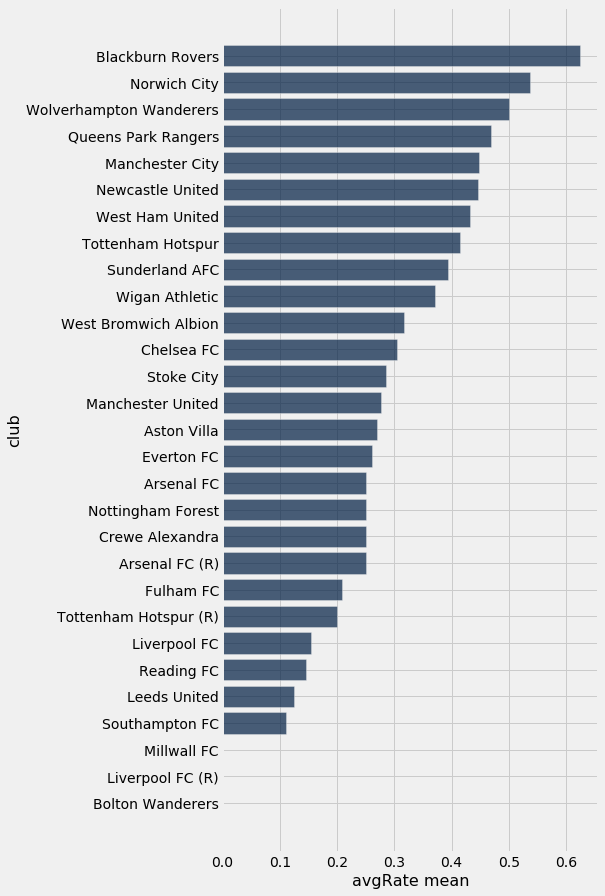

In [12]:
#KEY

reduced_eng = england.group("club", np.mean)
sorted_eng = reduced_eng.sort("avgRate mean", descending=True)
sorted_eng.barh("club", "avgRate mean")

<div class="alert alert-info">
        <b>Question:</b> Now, in the following two cells, create the same visualization for the French and Spanish leagues. 
     HINT: Use the template above column.
</div>

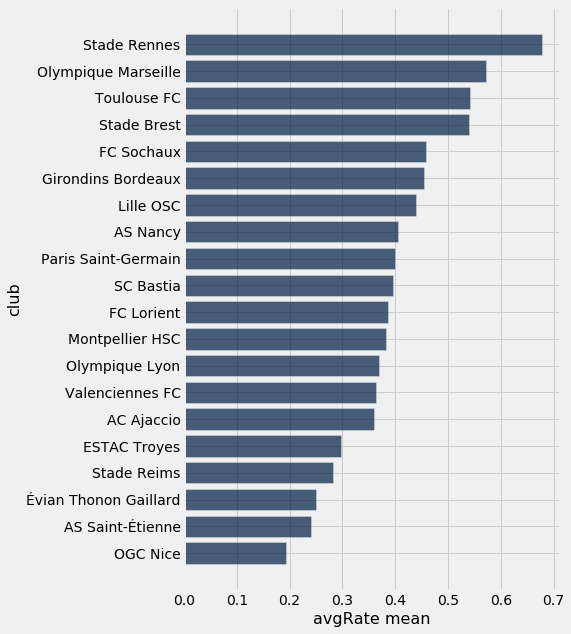

In [13]:
#KEY

france.group("club", np.mean).sort("avgRate mean", descending=True).barh("club", "avgRate mean")

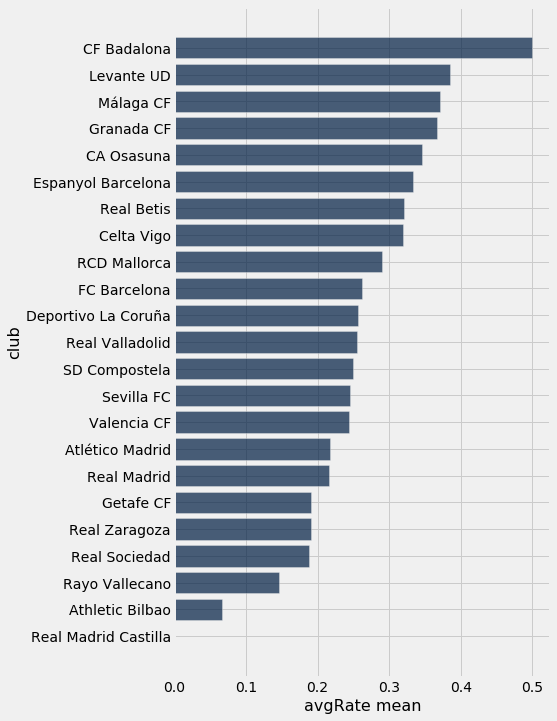

In [14]:
#KEY

spain.group("club", np.mean).sort("avgRate mean", descending=True).barh("club", "avgRate mean")

<div class="alert alert-info">
        <b>Question:</b> Do you recognize any of these teams? Based on your prior knowledge, or doing some quick internet rsearch, why do you think some clubs have much higher average skin ratings (i.e. more darker-skinned players)?
</div>

*INSERT ANSWER HERE*

### Part Two: Bar plots

Observe below how we're able to use a pivot table to make an insightful series of bar plots on the number of red cards awarded by referees officiating in different leagues across Europe. The number to the left of the plots' y axes represents the number of red cards awarded in those kinds of games. The labels of the plots' y axes is the number of games in that particular referee/league combination for the given number of red cards.

Run the following cell to load a new table. The values represent the number of games for each **club, number of red cards** combination in the French league:

In [15]:
france_agg = france.pivot("redCards", "club")
france_agg

club,0,1,2
AC Ajaccio,410,9,0
AS Nancy,253,8,0
AS Saint-Étienne,655,8,0
ESTAC Troyes,257,2,0
FC Lorient,504,10,1
FC Sochaux,582,7,0
Girondins Bordeaux,1406,23,1
Lille OSC,1495,14,0
Montpellier HSC,1201,36,2
OGC Nice,380,10,0


And now run the below cell to plot a bar chart for each individual league. Note that our `width` argument specifies how would our bar plot will be. In this case, we want to set the value as `20` so that the data is not crunched together.

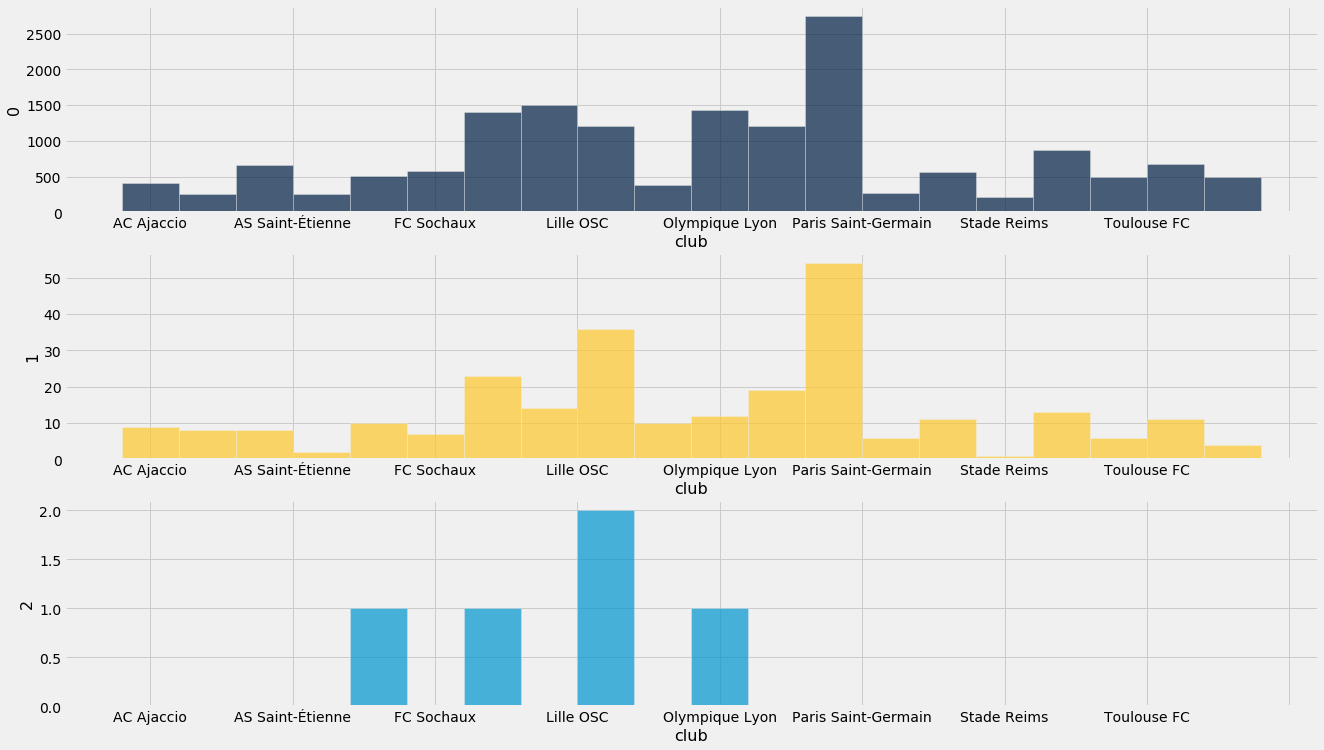

In [16]:
france_agg.bar("club", overlay=False, width=20)

<div class="alert alert-info">
<b>Question:</b> 
Interpret what you see. Which clubs (if any) do you hypothesis tend to award more/less red cards? Feel free to do some research on play style of these teams.
   </div>

*INSERT ANSWER HERE*

<div class="alert alert-info">
<b>Question:</b> How does the popularity of each club introduce bias into the above charts? Think about the amount of players on each team in the original data set. Does it make sense that the more successful clubs have more cards?
   </div>

*INSERT ANSWER HERE*

Now, in the following two cells, produce the same visualizations as above for the English and Spanish leagues.

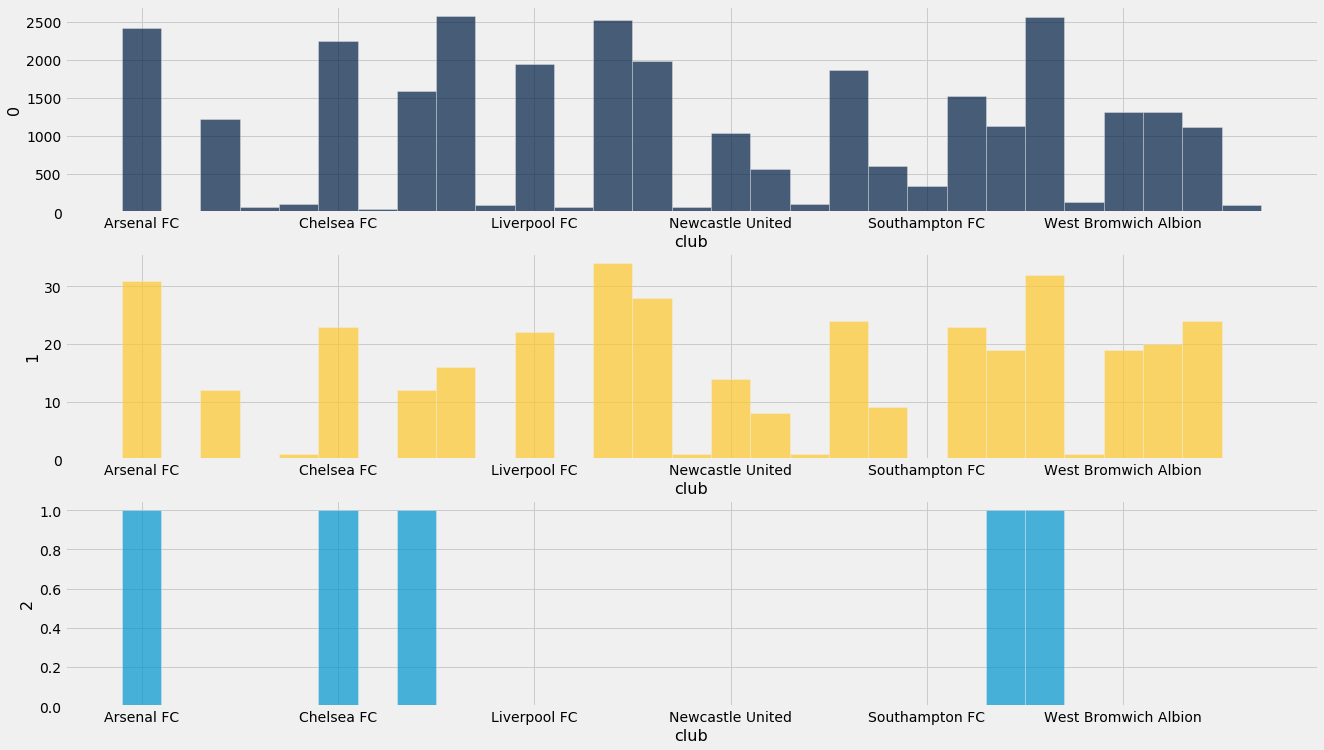

In [17]:
#KEY

england_agg = england.pivot("redCards", "club")

england_agg.bar("club", overlay=False, width=20)

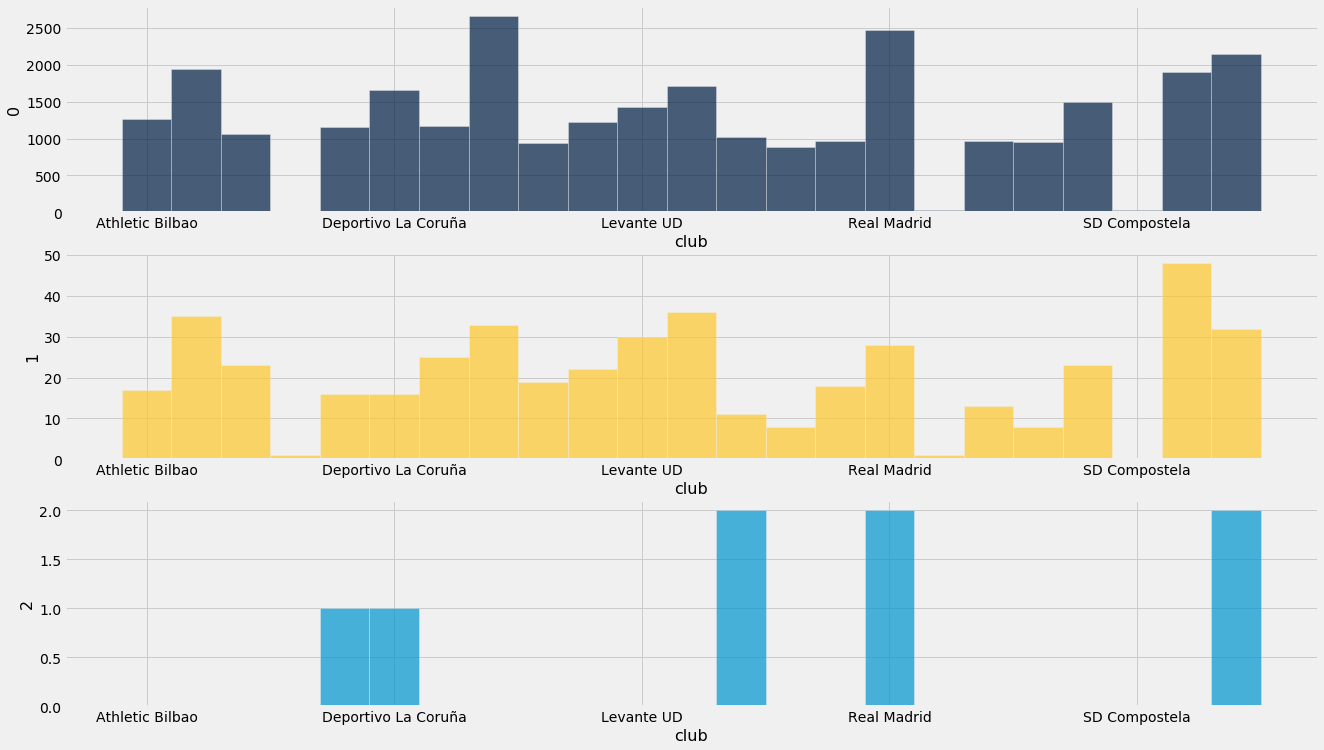

In [19]:
#KEY

spain_agg = spain.pivot("redCards", "club")

spain_agg.bar("club", overlay=False, width=20)

## The German *Bundesliga*

Throughout the notebook, we have used club data from England's *Premier League*, Spain's *La Liga*, and France's *Ligue 1*. Now, it is time to turn our attention to German football. In the following few cells, conduct your own EDA on the German league by roughly following these steps:
- Create a new table, `germany`, that only has data from German clubs
- Create a horizontal bar chart showing the average skin rating for each club
- Create a vertical bar chart showcasing the red card incidents for each club

If you get stuck, or are unsure where to start, feel free to look at the above cells for some examples (England, France, Spain). Alternatively, please don't hesitate to reach out to your facilitators!

# Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Throughout this notebook, we used the `club` column of our original table to look further into our data set. Rather than looking at leagues as a whole, we investigated further and looked at the relationshios between clubs within a league. Answer the following questions to reflect on and report your findings!

<div class="alert alert-info"> 
<b>Question:</b> Last week, we looked at comparisons between different nations. Now, we are looking at different teams within each nation. Were the results as clear as they were last week? What information is needed to arrive at more clear conclusions?
</div>

*INSERT ANSWER HERE*

<div class="alert alert-info"> 
<b>Question:</b> What is something surprising that you found from this investigation?
</div>

*INSERT ANSWER HERE*

<div class="alert alert-success" role="alert">
  <h2 class="alert-heading">Well done!</h2>
    <p>In this report, you dove right into European football club data by focusing on the average skin rating for each team. Additionally, you looked at the red card distribution for each club in several leagues across Europe.
    <hr>
    <p> Notebook created for Berkeley Unboxing Data Science 2021 
    <p> Adapted from Project 2: Soccer by Will Furtado with the support of Ani Adhikari, Deb Nolan, and Carlos Ortiz
</div>